# Analisis Kemiskinan dan Indeks Pembangunan Manusia (IPM)  
## Provinsi di Pulau Jawa, 2015–2024



In [54]:
#IMPORT LIBRARY

import pandas as pd

from pathlib import Path


## 1. Pendahuluan

Kemiskinan dan Indeks Pembangunan Manusia (IPM) merupakan dua indikator utama
dalam menilai tingkat kesejahteraan masyarakat. IPM mencerminkan kualitas
pembangunan manusia dari aspek kesehatan, pendidikan, dan standar hidup,
sementara tingkat kemiskinan menggambarkan kondisi ekonomi penduduk.

Pulau Jawa memiliki peran strategis dalam perekonomian nasional dengan jumlah
penduduk dan aktivitas ekonomi yang tinggi. Oleh karena itu, analisis dinamika
kemiskinan dan IPM di Pulau Jawa menjadi penting untuk memahami kondisi
pembangunan regional.

Project ini bertujuan untuk menganalisis perkembangan kemiskinan dan IPM
provinsi-provinsi di Pulau Jawa selama periode 2015–2024 menggunakan pendekatan
analisis deskriptif dan visualisasi data.


## 2. Data dan Metodologi

### 2.1 Sumber Data
Data yang digunakan dalam analisis ini bersumber dari Badan Pusat Statistik (BPS)
Indonesia, yang meliputi:
- Data tingkat kemiskinan provinsi
- Data Indeks Pembangunan Manusia (IPM) provinsi

### 2.2 Cakupan Analisis
- Wilayah: Provinsi di Pulau Jawa (DKI Jakarta, Jawa Barat, Jawa Tengah,
  DI Yogyakarta, Jawa Timur, dan Banten)
- Periode waktu: 2015–2024
- Unit analisis: Provinsi–tahun

### 2.3 Metode Analisis
Tahapan analisis yang dilakukan meliputi:
1. Data cleaning dan standarisasi data multi-tahun
2. Penggabungan data kemiskinan dan IPM menjadi dataset panel
3. Analisis deskriptif menggunakan statistik ringkas
4. Visualisasi tren dan perbandingan antar provinsi


In [55]:
#SET PATH

BASE_DIR = Path(r"D:\PROJECT INTERN") / "DATA"

PATH_IPM = BASE_DIR / "IPM"
PATH_KEMISKINAN = BASE_DIR / "kemiskinan"

OUT_DIR = Path(r"D:\PROJECT INTERN") / "data_clean"
OUT_DIR.mkdir(exist_ok=True)


In [56]:
#DAFTAR PROVINSI DI PULAU JAWA

PROV_JAWA = [
    "DKI Jakarta",
    "Jawa Barat",
    "Jawa Tengah",
    "DI Yogyakarta",
    "Jawa Timur",
    "Banten"
]

MAP_PROV = {
    "DKI JAKARTA": "DKI Jakarta",
    "JAWA BARAT": "Jawa Barat",
    "JAWA TENGAH": "Jawa Tengah",
    "DI YOGYAKARTA": "DI Yogyakarta",
    "JAWA TIMUR": "Jawa Timur",
    "BANTEN": "Banten"
}


In [57]:
#FUNCTION FILE IPM

def load_ipm(file_path):
    tahun = int(file_path.stem[-4:])

    df = pd.read_excel(file_path)
    df.columns = ["provinsi", "ipm"]

    df["provinsi"] = (
        df["provinsi"]
        .astype(str)
        .str.upper()
        .map(MAP_PROV)
        .fillna(df["provinsi"])
    )

    df["ipm"] = pd.to_numeric(df["ipm"], errors="coerce")
    df["tahun"] = tahun

    return df[["provinsi", "tahun", "ipm"]]


In [58]:
#FUNCTION FILE KEMISKINAN

def load_kemiskinan(file_path):
    tahun = int(file_path.stem[-4:])

    df_raw = pd.read_excel(file_path, header=None)

    # cari baris awal data (ACEH)
    start_row = df_raw[df_raw.iloc[:, 0] == "ACEH"].index[0]

    # ambil semua kolom angka di baris ACEH
    numeric_cols = df_raw.iloc[start_row].apply(
        lambda x: pd.to_numeric(x, errors="coerce")
    )

    col_value = numeric_cols.dropna().index[-1]  # kolom angka paling kanan

    df = df_raw.iloc[start_row:, [0, col_value]].copy()
    df.columns = ["provinsi", "kemiskinan"]

    df["provinsi"] = (
        df["provinsi"]
        .astype(str)
        .str.upper()
        .map(MAP_PROV)
        .fillna(df["provinsi"])
    )

    df["kemiskinan"] = pd.to_numeric(df["kemiskinan"], errors="coerce")
    df["tahun"] = tahun

    return df[["provinsi", "tahun", "kemiskinan"]]


In [59]:
#LOAD SEMUA FILE (2015-2024)

df_ipm = pd.concat(
    [load_ipm(f) for f in sorted(PATH_IPM.glob("*.xlsx"))],
    ignore_index=True
)

df_kemiskinan = pd.concat(
    [load_kemiskinan(f) for f in sorted(PATH_KEMISKINAN.glob("*.xlsx"))],
    ignore_index=True
)


In [60]:
#FILTER PROVINSI UNTUK PULAU JAWA

df_ipm = df_ipm[df_ipm["provinsi"].isin(PROV_JAWA)]
df_kemiskinan = df_kemiskinan[df_kemiskinan["provinsi"].isin(PROV_JAWA)]


In [61]:
#GABUNG DATASET

df_panel = (
    df_kemiskinan
    .merge(df_ipm, on=["provinsi", "tahun"], how="left")
    .sort_values(["provinsi", "tahun"])
    .reset_index(drop=True)
)


In [62]:
#SIMPAN DATA FINAL

df_panel.to_excel(
    OUT_DIR / "panel_jawa_2015_2024.xlsx",
    index=False
)


PermissionError: [Errno 13] Permission denied: 'D:\\PROJECT INTERN\\data_clean\\panel_jawa_2015_2024.xlsx'

Exploratory Data Analysis and Visualisation

In [19]:
#IMPORT LIBRARY DAN LOAD DATA

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel(r"D:\PROJECT INTERN\data_clean\panel_jawa_2015_2024.xlsx")
df.head()

,provinsi,tahun,kemiskinan,ipm
0,Banten,2015,5.75,70.27
1,Banten,2016,5.36,70.96
2,Banten,2017,5.59,71.42
3,Banten,2018,5.25,71.95
4,Banten,2019,4.94,72.44


In [24]:
#CEK STRUKTUR DAN KUALITAS DATA

print("INFO DATA")
df.info()

print("\nMISSING VALUE")
print(df.isnull().sum())

print("\nDESKRIPSI DATA")
df.describe()


INFO DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   provinsi    60 non-null     object 
 1   tahun       60 non-null     int64  
 2   kemiskinan  60 non-null     float64
 3   ipm         60 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.0+ KB

MISSING VALUE
provinsi      0
tahun         0
kemiskinan    0
ipm           0
dtype: int64

DESKRIPSI DATA


,tahun,kemiskinan,ipm
count,60.00000,60.000000,60.000000
mean,2019.50000,8.689667,74.704833
std,2.89652,3.114612,4.259591
min,2015.00000,3.420000,68.950000
25%,2017.00000,5.737500,71.480000
50%,2019.50000,9.565000,72.955000
75%,2022.00000,11.297500,79.547500
max,2024.00000,13.320000,83.080000


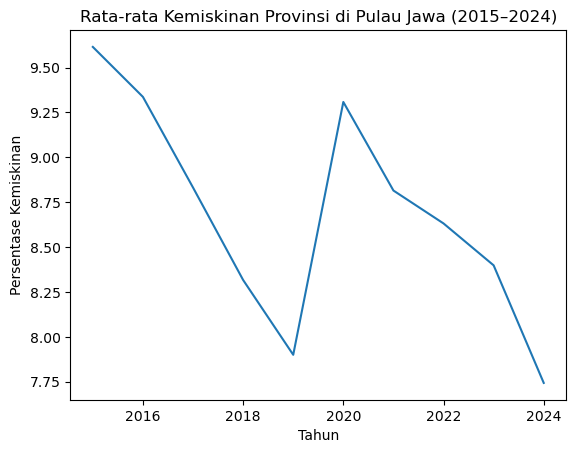

In [31]:
#TREN KEMISKINAN

import matplotlib.pyplot as plt

# Pastikan kolom tahun itu numeric
df["tahun"] = pd.to_numeric(df["tahun"], errors="coerce")

# 1) Buat trend kemiskinan jadi DataFrame yang jelas
trend_kemiskinan = (
    df.groupby("tahun")["kemiskinan"]
      .mean()
      .reset_index()   # <-- ini kunci
)

# 2) Plot kemiskinan
plt.figure()
plt.plot(trend_kemiskinan["tahun"], trend_kemiskinan["kemiskinan"])
plt.title("Rata-rata Kemiskinan Provinsi di Pulau Jawa (2015–2024)")
plt.xlabel("Tahun")
plt.ylabel("Persentase Kemiskinan")
plt.show()


## 3. Hasil dan Pembahasan

### 3.1 Tren Kemiskinan di Pulau Jawa

Berdasarkan hasil visualisasi, tingkat kemiskinan rata-rata provinsi di Pulau
Jawa menunjukkan tren penurunan selama periode 2015–2019. Namun, pada tahun
2020 terjadi peningkatan yang cukup signifikan, yang diduga berkaitan dengan
dampak pandemi COVID-19 terhadap kondisi ekonomi masyarakat.

Setelah tahun 2020, tingkat kemiskinan kembali mengalami penurunan secara
bertahap hingga tahun 2024, mengindikasikan adanya proses pemulihan ekonomi
di wilayah Pulau Jawa.


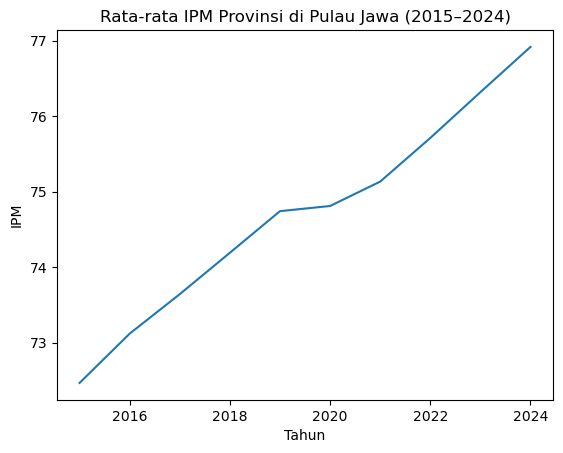

In [32]:
#TREN IPM

trend_ipm = (
    df.groupby("tahun")["ipm"]
      .mean()
      .reset_index()
)

plt.figure()
plt.plot(trend_ipm["tahun"], trend_ipm["ipm"])
plt.title("Rata-rata IPM Provinsi di Pulau Jawa (2015–2024)")
plt.xlabel("Tahun")
plt.ylabel("IPM")
plt.show()


### 3.2 Tren IPM di Pulau Jawa

Grafik IPM menunjukkan peningkatan yang relatif konsisten sepanjang periode
2015–2024. Tidak terlihat penurunan IPM yang signifikan, termasuk pada periode
pandemi, meskipun laju peningkatan sempat melambat.

Hal ini menunjukkan bahwa pembangunan manusia bersifat lebih struktural dan
jangka panjang, sehingga tidak mudah terpengaruh oleh guncangan ekonomi dalam
jangka pendek.


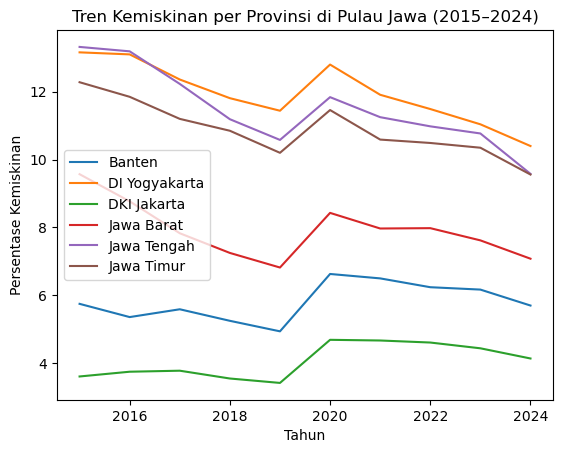

In [34]:
#TREN KEMISKINAN PER PROVINSI

plt.figure()

for prov in df["provinsi"].unique():
    d = df[df["provinsi"] == prov]
    plt.plot(d["tahun"], d["kemiskinan"], label=prov)

plt.title("Tren Kemiskinan per Provinsi di Pulau Jawa (2015–2024)")
plt.xlabel("Tahun")
plt.ylabel("Persentase Kemiskinan")
plt.legend()
plt.show()


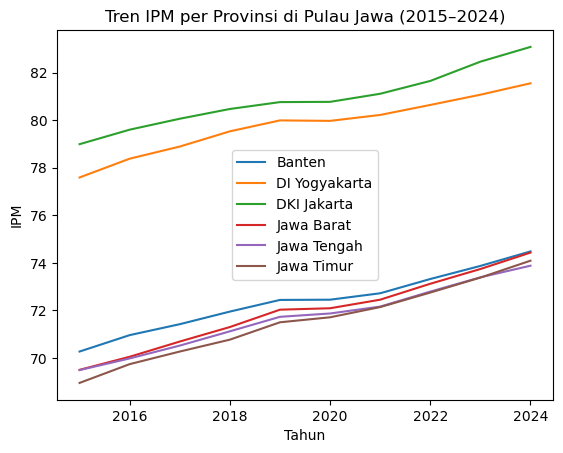

In [35]:
#TREN IPM PER PROVINSI

plt.figure()

for prov in df["provinsi"].unique():
    d = df[df["provinsi"] == prov]
    plt.plot(d["tahun"], d["ipm"], label=prov)

plt.title("Tren IPM per Provinsi di Pulau Jawa (2015–2024)")
plt.xlabel("Tahun")
plt.ylabel("IPM")
plt.legend()
plt.show()


### 3.3 Perbandingan Antar Provinsi

Hasil visualisasi menunjukkan adanya perbedaan tingkat kemiskinan dan IPM
antar provinsi di Pulau Jawa. Beberapa provinsi secara konsisten berada pada
tingkat kemiskinan yang lebih tinggi dibandingkan provinsi lainnya, sementara
provinsi dengan karakteristik perkotaan cenderung memiliki IPM yang lebih tinggi.

Meskipun seluruh provinsi menunjukkan tren perbaikan IPM, kesenjangan antar
provinsi relatif tetap sepanjang periode pengamatan.


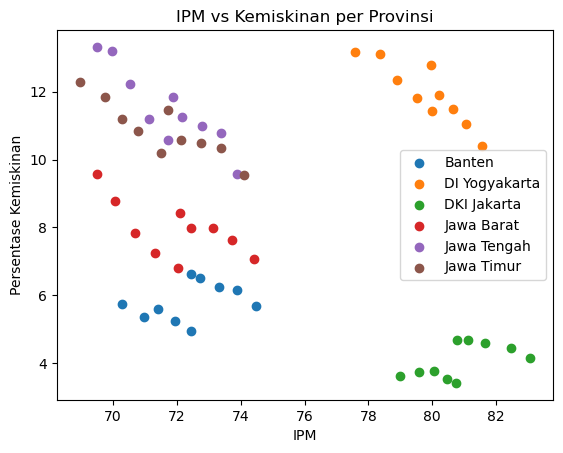

In [37]:
#SCATTER : HUBUNGAN IPM VS KEMISKINAN

plt.figure()

for prov in df["provinsi"].unique():
    d = df[df["provinsi"] == prov]
    plt.scatter(d["ipm"], d["kemiskinan"], label=prov)

plt.title("IPM vs Kemiskinan per Provinsi")
plt.xlabel("IPM")
plt.ylabel("Persentase Kemiskinan")
plt.legend()
plt.show()


### 3.4 Hubungan IPM dan Kemiskinan

Scatter plot antara IPM dan tingkat kemiskinan menunjukkan adanya kecenderungan
hubungan negatif, di mana provinsi dengan IPM lebih tinggi cenderung memiliki
tingkat kemiskinan yang lebih rendah. Namun, hubungan tersebut tidak bersifat
sempurna dan bervariasi antar provinsi.

Hal ini mengindikasikan bahwa IPM bukan satu-satunya faktor yang memengaruhi
tingkat kemiskinan, dan terdapat faktor struktural lain yang turut berperan.


## 4. Kesimpulan

Berdasarkan hasil analisis, IPM di provinsi-provinsi Pulau Jawa menunjukkan
tren peningkatan yang konsisten selama periode 2015–2024, sementara tingkat
kemiskinan cenderung menurun meskipun sempat mengalami peningkatan pada tahun
2020.

Terdapat perbedaan tingkat kemiskinan dan IPM antar provinsi yang bersifat
persisten. Selain itu, hubungan antara IPM dan kemiskinan cenderung negatif,
namun tidak homogen antar provinsi, sehingga upaya pengentasan kemiskinan
memerlukan pendekatan yang komprehensif dan kontekstual.


## 5. Keterbatasan dan Saran

Analisis ini bersifat deskriptif dan belum menguji hubungan kausal antar variabel.
Selain itu, variabel ekonomi lain seperti PDRB, tingkat pengangguran, dan inflasi
belum dimasukkan dalam analisis.

Penelitian selanjutnya dapat memperluas cakupan variabel dan menggunakan metode
kuantitatif lanjutan untuk memperoleh pemahaman yang lebih mendalam.
